# CBR



## Case 1: categorical target (classification)





### Step 1. Dataset preprocessing




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataI = pd.read_csv(url, names=names)
dataI.head()

sepal-length  sepal-width  petal-length  petal-width        Class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [ ]:
x1 = dataI.iloc[:, :4]
y1 = dataI.iloc[:, 4]
x1.describe()

sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [ ]:
y1.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Class, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaled_x = pd.DataFrame(StandardScaler().fit_transform(x1), columns=x1.columns, index = x1.index)
scaled_x.describe() # 표준화 이후, 독립변수(feature)의 기초통계량

sepal-length   sepal-width  petal-length   petal-width
count  1.500000e+02  1.500000e+02  1.500000e+02  1.500000e+02
mean  -2.775558e-16 -5.140333e-16  1.154632e-16  9.251859e-16
std    1.003350e+00  1.003350e+00  1.003350e+00  1.003350e+00
min   -1.870024e+00 -2.438987e+00 -1.568735e+00 -1.444450e+00
25%   -9.006812e-01 -5.877635e-01 -1.227541e+00 -1.181504e+00
50%   -5.250608e-02 -1.249576e-01  3.362659e-01  1.332259e-01
75%    6.745011e-01  5.692513e-01  7.627586e-01  7.905908e-01
max    2.492019e+00  3.114684e+00  1.786341e+00  1.710902e+00

### Step 2. Train test split
- 적절한 k값 선택을 위해 train, valid, test set으로 구분

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y1, test_size = 0.2, random_state = 50, stratify=y1)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2, random_state = 50, stratify=y_train)

In [ ]:
print("train set:",x_train.shape)
print("valid set:",x_valid.shape)
print("test set:",x_test.shape)
x_test.value_counts()


train set: (96, 4)
valid set: (24, 4)
test set: (30, 4)


sepal-length  sepal-width  petal-length  petal-width
-1.748856      0.337848    -1.398138     -1.312977      1
-1.506521      0.800654    -1.341272     -1.181504      1
 2.249683      1.726266     1.672610      1.316483      1
              -1.050569     1.786341      1.447956      1
 2.128516     -0.124958     1.615744      1.185010      1
 1.401508      0.337848     0.535296      0.264699      1
 1.159173     -0.587764     0.592162      0.264699      1
 1.038005      0.569251     1.103953      1.710902      1
               0.106445     1.047087      1.579429      1
              -0.124958     0.705893      0.659118      1
 0.795669     -0.124958     1.160819      1.316483      1
 0.674501      0.337848     0.876490      1.447956      1
              -0.356361     0.307833      0.133226      1
              -0.587764     1.047087      1.185010      1
 0.432165     -0.587764     0.592162      0.790591      1
 0.310998     -0.356361     0.535296      0.264699      1
 0.189830     -0.35

### Step 3. Sampling
- class 가 균등하게 있기에 sampling을 진행할 필요 X 

### Step 4. KNN classification
- `sklearn.neighbors`의 [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)을 사용
- 가중치 부여 (weights)
  - uniform: 동일한 가중치를 부여하는 방법으로, 단순 평균을 사용
  - distance: 거리가 가까운 이웃의 영향을 더 많이 받도록 설정
- 계산 알고리즘 (algorithm)
  - auto: the most appropriate algorithm based on the values passed to fit method
  - ball_tree: [BallTree](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.BallTree.html#sklearn.neighbors.BallTree)
  - kd_tree: [KDTree](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KDTree.html#sklearn.neighbors.KDTree)
  - brute: brute-force search (sparse input의 경우 권장)
- 거리 계산의 척도 [(metric)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.DistanceMetric.html#sklearn.metrics.DistanceMetric)  


|identifier|distance|args|distance function|
|:--------:|:------:|:--:|:---------------:|
|euclidean|EuclideanDistance||sqrt(sum((x - y)^2))|
|manhattan|ManhattanDistance||sum(\|x - y\|)|
|chebyshev|ChebyshevDistance||max(\|x - y\|)|
|minkowski|MinkowskiDistance|p, w|sum(w *\|x - y\|^p)^(1/p)|
|wminkowski|WMinkowskiDistance|p, w|sum(\|w * (x - y)\|^p)^(1/p)|
|seuclidean|SEuclideanDistance|V|sqrt(sum((x - y)^2 / V))|
|mahalanobis|MahalanobisDistance|V or VI|sqrt((x - y)' V^-1 (x - y))|

- 유클리드 거리: 모든 attribute에 대해 동일한 가중치를 두고 거리를 측정
- 마할라노비스 거리: 상관관계에 따라 거리를 조정하기 위하여 공분산 행렬을 사용  
  - euclidean 거리는 마할라노비스 거리에서 correlation이 0인 특수한 경우
  - 자세한 설명은 [여기](https://www.reddit.com/r/AskStatistics/comments/9sdofc/mahalanobis_distance_vs_euclidean_distance/)에서 확인 가능

- iteration을 반복할 때마다 distance metric을 업데이트하는 것은 계산 비용이 많이 듦 (KNN: lazy learning algorithm)
- best K값을 선택하는 통계적 방법은 없으므로, 각 K에 따른 오류율을 비교하여 K 선택
  - K 값을 작게 선택하면 결정 경계가 불안정해질 수 있음
  - 큰 K 값은 결정 경계를 부드럽게 하기 때문에 분류에 더 좋을 수 있음


Validate data로 accuracy 찾기

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

'''
k를 변화시켜가며 더 적합한 k를 찾기 위해 plot을 통해 accuracy를 확인
'''
# algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}

k_list = range(1,31) # k= 1~30까지 조절 
accuracies = []
best_k = 0
best_acc = 0
k_index = []

for k in k_list:
#wm    classifier = KNeighborsClassifier(n_neighbors = k, weights="distance",algorithm='auto', metric='wminkowski',metric_params={'w': weights},p=1)
    classifier = KNeighborsClassifier(n_neighbors = k, weights="distance",algorithm='auto', metric='mahalanobis',metric_params = {'V': np.cov(x_train,rowvar=False)})
    classifier.fit(x_train, y_train)
    acc = classifier.score(x_valid, y_valid)
    accuracies.append(acc)
    k_index.append(k)
    if best_acc < acc:
        best_acc = acc
        best_k = k

print(best_k)
k_list2 = pd.DataFrame(data ={'accuracy':accuracies},
                      index= k_index)
k_list2



5


accuracy
1   0.875000
2   0.875000
3   0.916667
4   0.916667
5   0.958333
6   0.958333
7   0.958333
8   0.958333
9   0.958333
10  0.916667
11  0.958333
12  0.958333
13  0.958333
14  0.958333
15  0.958333
16  0.958333
17  0.958333
18  0.958333
19  0.958333
20  0.958333
21  0.916667
22  0.875000
23  0.916667
24  0.958333
25  0.916667
26  0.916667
27  0.916667
28  0.916667
29  0.958333
30  0.875000

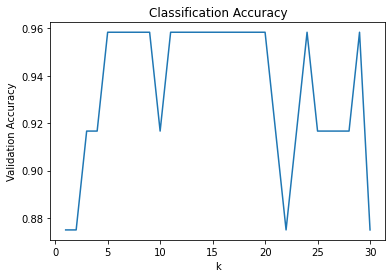

5


In [ ]:

plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Classification Accuracy")
plt.show()
print(best_k)

Test data로 accuracy 찾기

In [ ]:
k_list = range(1,31) # k= 1~30까지 조절 
accuracies = []
best_k2 = 0
best_acc = 0
k_index = []
for k in k_list:
#    classifier = KNeighborsClassifier(n_neighbors = k, weights="distance",algorithm='auto',metric='wminkowski',metric_params={'w': weights},p=1)
    classifier = KNeighborsClassifier(n_neighbors = k, weights="distance",algorithm='auto',metric='mahalanobis',metric_params = {'V': np.cov(x_train,rowvar=False)})
    classifier.fit(x_train, y_train)
    acc = classifier.score(x_test, y_test)
    accuracies.append(acc)
    k_index.append(k)
    if best_acc < acc:
        best_acc = acc
        best_k2 = k
print(best_k2)
k_list2 = pd.DataFrame(data ={'accuracy':accuracies},
                      index= k_index)
k_list2

17


accuracy
1   0.933333
2   0.933333
3   0.966667
4   0.966667
5   0.966667
6   0.966667
7   0.966667
8   0.966667
9   0.966667
10  0.966667
11  0.966667
12  0.966667
13  0.966667
14  0.966667
15  0.966667
16  0.966667
17  1.000000
18  1.000000
19  1.000000
20  1.000000
21  1.000000
22  1.000000
23  1.000000
24  1.000000
25  1.000000
26  1.000000
27  1.000000
28  1.000000
29  0.966667
30  1.000000

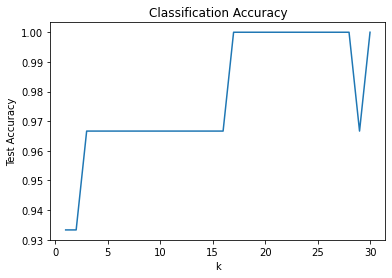

In [ ]:
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Test Accuracy")
plt.title("Classification Accuracy")
plt.show()

In [ ]:
#classifier = KNeighborsClassifier(n_neighbors = 19, weights="distance", metric='wminkowski',metric_params={'w': weights},p=1)
classifier = KNeighborsClassifier(n_neighbors = 22, weights="distance",metric='mahalanobis', metric_params = {'V': np.cov(x_train,rowvar=False)})
classifier.fit(x_train, y_train)
print(classifier.score(x_valid, y_valid)) # accuracy

0.875


### Step 5. Evaluation
- target이 categorical 변수이므로 confusion matrix를 사용하여 모델의 성능 비교  
- Confusion matrix (오차 행렬): training을 통한 prediction 성능을 측정하기 위해 예측 value와 실제 value를 비교하기 위한 표
  - **accuracy** (정확도): 전체 중 모델이 바르게 분류한 비율. $Accuracy=\frac{TP+TN}{TP+FN+FP+TN}$
  - **precision** (정밀도): 모델이 Positive라 분류한 것 중 실제값이 Positive인 비율. $Precision=\frac{TP}{TP+FP}$
  - **recall** (재현도): 실제값이 Positive인 것 중 모델이 Positive라 분류한 비율. $Recall=\frac{TP}{TP+FN}$
  - **f-beta**: Precision과 Recall의 조화평균. $F_{\beta}=(1+\beta^2)\cdot\frac{precision \cdot recall}{(\beta^2 \cdot precision)+recall}$
    - precision과 recall에 얼마나 가중치를 줄지에 따라 적절한 beta 값 선택
    - beta=1인 경우 **F1 score**
    - 데이터가 불균형한 경우 Accuracy가 아닌 F1 Score를 사용하여 평가
    - 다중 class의 경우 다음과 같이 계산 ([참고](https://leedakyeong.tistory.com/entry/%EB%B6%84%EB%A5%98-%EB%AA%A8%EB%8D%B8-%EC%84%B1%EB%8A%A5-%ED%8F%89%EA%B0%80-%EC%A7%80%ED%91%9C-Confusion-Matrix%EB%9E%80-%EC%A0%95%ED%99%95%EB%8F%84Accuracy-%EC%A0%95%EB%B0%80%EB%8F%84Precision-%EC%9E%AC%ED%98%84%EB%8F%84Recall-F1-Score))

[[8 0 0]
 [0 7 1]
 [0 2 6]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



Text(0.5, 1.0, 'Confusion Matrix')

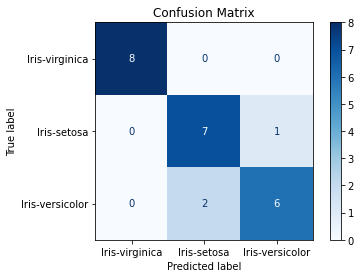

In [ ]:
# Confusion Matrix
# 기준: y=0: Negative, y=1: Positive

#          예측값
# 실제값  TN   FP
#         FN   TP

from sklearn.metrics import confusion_matrix, plot_confusion_matrix
y_pred = classifier.predict(x_valid)
print(confusion_matrix(y_valid, y_pred))

import matplotlib.pyplot as plt
from matplotlib import cm

plot = plot_confusion_matrix(classifier, # 분류 모델
                             x_valid, y_valid, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=['Iris-virginica', 'Iris-setosa','Iris-versicolor'], # 표에 표시할 labels
                             cmap=cm.Blues, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None
plot.ax_.set_title('Confusion Matrix')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(" Accuracy:", accuracy_score(y_valid, y_pred))
print("Precision:", precision_score(y_valid, y_pred, average='micro'))
print("   Recall:", recall_score(y_valid, y_pred, average='micro'))
print(" F1 score:", f1_score(y_valid, y_pred, average= 'micro'))

 Accuracy: 0.875
Precision: 0.875
   Recall: 0.875
 F1 score: 0.875


# Case 2: continuous target(regression)


### Step 1. Dataset preprocessing


In [ ]:
import pandas as pd 
from google.colab import files

myfile = files.upload()
dataB = pd.read_csv('Boston_house.csv')
dataB=dataB.drop(['CHAS','RAD'],axis=1)
dataB.head()

Saving Boston_house.csv to Boston_house (4).csv


AGE       B     RM     CRIM     DIS  INDUS  LSTAT    NOX  PTRATIO    ZN  \
0  65.2  396.90  6.575  0.00632  4.0900   2.31   4.98  0.538     15.3  18.0   
1  78.9  396.90  6.421  0.02731  4.9671   7.07   9.14  0.469     17.8   0.0   
2  61.1  392.83  7.185  0.02729  4.9671   7.07   4.03  0.469     17.8   0.0   
3  45.8  394.63  6.998  0.03237  6.0622   2.18   2.94  0.458     18.7   0.0   
4  54.2  396.90  7.147  0.06905  6.0622   2.18   5.33  0.458     18.7   0.0   

   TAX  Target  
0  296    24.0  
1  242    21.6  
2  242    34.7  
3  222    33.4  
4  222    36.2

In [ ]:
from IPython.display import display
display(dataB.head())
print('\n', dataB.shape)
# CRIM - per capita crime rate by town  
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft. 
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT - % lower status of the population
# MEDV - Median value of owner-occupied homes in $1000's


AGE       B     RM     CRIM     DIS  INDUS  LSTAT    NOX  PTRATIO    ZN  \
0  65.2  396.90  6.575  0.00632  4.0900   2.31   4.98  0.538     15.3  18.0   
1  78.9  396.90  6.421  0.02731  4.9671   7.07   9.14  0.469     17.8   0.0   
2  61.1  392.83  7.185  0.02729  4.9671   7.07   4.03  0.469     17.8   0.0   
3  45.8  394.63  6.998  0.03237  6.0622   2.18   2.94  0.458     18.7   0.0   
4  54.2  396.90  7.147  0.06905  6.0622   2.18   5.33  0.458     18.7   0.0   

   TAX  Target  
0  296    24.0  
1  242    21.6  
2  242    34.7  
3  222    33.4  
4  222    36.2


 (506, 12)


In [ ]:
import pandas as pd
x = dataB.iloc[:,0:11]
y = dataB.iloc[:,11]
x.describe()

AGE           B          RM        CRIM         DIS       INDUS  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901  356.674032    6.284634    3.613524    3.795043   11.136779   
std     28.148861   91.294864    0.702617    8.601545    2.105710    6.860353   
min      2.900000    0.320000    3.561000    0.006320    1.129600    0.460000   
25%     45.025000  375.377500    5.885500    0.082045    2.100175    5.190000   
50%     77.500000  391.440000    6.208500    0.256510    3.207450    9.690000   
75%     94.075000  396.225000    6.623500    3.677083    5.188425   18.100000   
max    100.000000  396.900000    8.780000   88.976200   12.126500   27.740000   

            LSTAT         NOX     PTRATIO          ZN         TAX  
count  506.000000  506.000000  506.000000  506.000000  506.000000  
mean    12.653063    0.554695   18.455534   11.363636  408.237154  
std      7.141062    0.115878    2.164946   23.322453  168.537116  
min      1.730000    0.385000   12.600000    0.000000  187.000000  
25%      6.950000    0.449000   17.400000    0.000000  279.000000  
50%     11.360000    0.538000   19.050000    0.000000  330.000000  
75%     16.955000    0.624000   20.200000   12.500000  666.000000  
max     37.970000    0.871000   22.000000  100.000000  711.000000

In [ ]:
# Z-score standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_std = scaler.fit_transform(x)

### Step 2. Train test split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size = 0.2, random_state = 312)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2, random_state = 312)
y_test

360    25.0
358    22.7
483    21.8
45     19.3
330    19.8
       ... 
331    17.1
270    21.1
456    12.7
84     23.9
391    23.2
Name: Target, Length: 102, dtype: float64

In [ ]:
print("train set:",x_train.shape)
print("valid set:",x_valid.shape)
print("test set:",x_test.shape)

train set: (323, 11)
valid set: (81, 11)
test set: (102, 11)


### Step 3. KNN regression

Validate data를 이용하여 최적의 k 값 찾기 

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

'''
k를 변화시켜가며 더 적합한 k를 찾기 위해 plot을 통해 accuracy를 확인
'''
#algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}
# metric_params = {'w':weight},p=1)
weight = [1,2,3,3,2,1,3,2,2,2,3]
best_mse = 1000000000
k_list = range(1,21) # k= 1~20까지 조절
mses = []
k_index = []
for k in k_list:
  regressor_k = KNeighborsRegressor(n_neighbors = k, algorithm = 'auto',metric='wminkowski',metric_params = {'w':weight},p=1)
  regressor_k.fit(x_train, y_train)
  mse = mean_squared_error(y_valid, regressor_k.predict(x_valid))
  mses.append(mse)
  k_index.append(k)
  if best_mse > mse:
    best_mse = mse
    best_k = k
print(best_k)
k_list2 = pd.DataFrame(data ={'mse':mses},
                      index= k_index)
k_list2

5


mse
1   15.723333
2   13.023858
3   13.610398
4   14.427407
5   12.834785
6   13.348100
7   15.457944
8   14.202404
9   14.840302
10  14.355637
11  15.295912
12  15.382332
13  15.611155
14  15.723691
15  16.221154
16  16.275285
17  16.618176
18  16.991347
19  17.267656
20  18.128785

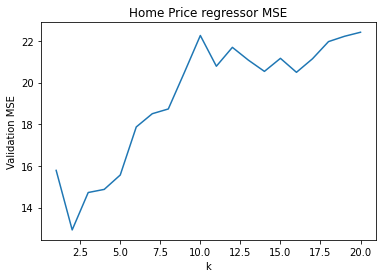

In [ ]:
plt.plot(k_list, mses)
plt.xlabel("k")
plt.ylabel("Validation MSE")
plt.title("Home Price regressor MSE")
plt.show()

Test Data를 이용하여 최적의 k 값 찾기

In [ ]:
'''
k를 변화시켜가며 더 적합한 k를 찾기 위해 plot을 통해 accuracy를 확인
'''
#algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}
best_mse = 1000000000
k_list = range(1,21) # k= 1~20까지 조절
mses = []
k_index = []
for k in k_list:
  regressor_k = KNeighborsRegressor(n_neighbors = k, algorithm = 'auto',metric='wminkowski',metric_params = {'w':weight},p=1)
  regressor_k.fit(x_train, y_train)
  mse = mean_squared_error(y_test, regressor_k.predict(x_test))
  mses.append(mse)
  k_index.append(k)
  if best_mse > mse:
    best_mse = mse
    best_k = k
print(best_k)
k_list2 = pd.DataFrame(data ={'mse':mses},
                      index= k_index)
k_list2

2


mse
1   15.015588
2   11.126642
3   11.803780
4   11.929099
5   13.839318
6   13.261476
7   14.354264
8   15.153134
9   14.388200
10  14.571781
11  15.077827
12  15.779199
13  15.813358
14  16.198187
15  16.814184
16  17.122874
17  17.323131
18  17.777598
19  17.893872
20  18.354505

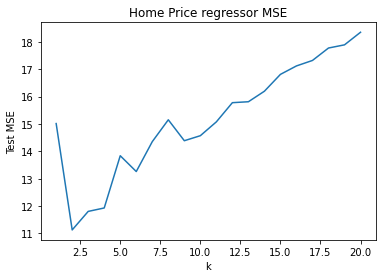

In [ ]:
plt.plot(k_list, mses)
plt.xlabel("k")
plt.ylabel("Test MSE")
plt.title("Home Price regressor MSE")
plt.show()

In [ ]:
regressor = KNeighborsRegressor(n_neighbors = 2 , algorithm = 'auto',metric='minkowski',p=1)
regressor.fit(x_train, y_train)
mse = mean_squared_error(y_valid, regressor.predict(x_valid))
print(mse)

12.932314814814811


In [ ]:
pred_y = regressor.predict(x_valid)
pred_y[:5]

array([30.9 , 21.55, 35.15, 10.25, 27.95])

### Step 4. Evaluation

- MSE (mean squared error): $\frac{1}{n}\sum_{i=1}^n{(y_i-\hat{y}_i)}^2$
  - 예측값과 실제값의 차이(오차)의 제곱 평균
  - 통계적 추정의 정확성에 대한 질적 척도
  - 제곱을 하기 때문에 아웃라이어에 민감
  - 오차값에 제곱을 취하기 때문에 (1) 오차가 0과 1 사이인 경우에, MSE에서 그 오차는 본래보다 더 작게 반영되고, (2) 오차가 1보다 클 때는 본래보다 더 크게 반영
- RMSE (root MSE): $\sqrt{\frac{1}{n}\sum_{i=1}^n{(y_i-\hat{y}_i)}^2}$
  - MSE에 루트를 취하여 MSE의 단점을 어느 정도 해소
  - MSE를 실제값과 유사한 단위로 변환하여 해석이 용이해짐
- MAE (mean absolute error): $\frac{1}{n}\sum_{i=1}^n{(|y_i-\hat{y}_i|)}$
  - 오차의 절댓값 평균
  - 아웃라이어에 보다 robust함
  - 모든 오차에 동일한 가중치를 부여
- MAPE (mean absolute percentage error): $\frac{100}{n}\sum_{i=1}^n{|\frac{y_i-\hat{y}_i}{y_i}|}$
  - MAE를 퍼센트 값으로 나타냄 (0~100)
  - 성능에 대해 이해하기 쉬움
- 어떤 경우에는 이상치를 무시하여 일반화할 필요가 있고 (=>MAE), 이상치도 고려하여 일반화(=>MSE)할 필요가 있음.
  - 모델 학습 시 이상치에 가중치를 부여하고자 한다면, MSE에 루트를 씌운 RMSE를 채택할 수 있음
- [참고1](https://steadiness-193.tistory.com/277), [참고2](https://jysden.medium.com/%EC%96%B8%EC%A0%9C-mse-mae-rmse%EB%A5%BC-%EC%82%AC%EC%9A%A9%ED%95%98%EB%8A%94%EA%B0%80-c473bd831c62), [참고3](https://acdongpgm.tistory.com/102)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
print("MSE :", mean_squared_error(y_valid, pred_y))
print("RMSE:", mean_squared_error(y_valid, pred_y, squared=False))
print("MAE :", mean_absolute_error(y_valid, pred_y))
print("MAPE:", mean_absolute_percentage_error(y_valid, pred_y))

MSE : 12.932314814814811
RMSE: 3.5961527796820327
MAE : 2.4425925925925926
MAPE: 0.11412244961180203


In [ ]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import Contours, Histogram2dContour, Marker, Scatter
import numpy as np

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))
  
configure_plotly_browser_state()
init_notebook_mode(connected=False)

trace0 = go.Scatter(
    y = y_valid,
    x = np.arange(81), 
    mode = 'lines', 
    name = 'Actual Price',
    marker = dict(
    color = 'rgb(50, 150, 50)')
)

trace1 = go.Scatter(
    y = pred_y,
    x = np.arange(81), 
    mode = 'lines', 
    name = 'Predicted Price',
    line = dict(
        color = 'rgb(110, 50, 140)',
        dash = 'dot'
    )
)


layout = go.Layout(
    xaxis = dict(title = 'Index'), 
    yaxis = dict(title = 'Price')
)

figure = go.Figure(data = [trace0, trace1], layout = layout)
print(iplot(figure))

None


[link text](https://)#**지윤님 저 이거 내일 이어서 할게용~~**

---


---


---

데이터 출처

http://www2.informatik.uni-freiburg.de/~cziegler/BX/

https://goldberg.berkeley.edu/jester-data/  

https://eigentaste.berkeley.edu/dataset/


# AR (Association Rules; 연관규칙)



- **연관규칙분석, 장바구니분석** (Association Rule Analysis, Market Basket Analysis)
  - 비지도학습
  - 고객의 대규모 거래 데이터(트랜잭션)로부터 함께 구매가 발생하는 규칙(예: A -> B)을 도출하여, 고객이 특정 상품 구매 시 이와 연관성 높은 상품을 추천  
  - 거래(transaction)와 항목(item)으로 구성되어 있는 경우  
  - 상품 간의 관련성(방향성)을 고려할 수 있음 => 키워드 간의 관계를 고려하는 데에도 사용 (예를 들어, 관련 연구는 [여기1](http://dx.doi.org/10.5859/KAIS.2021.30.1.123), [여기2](https://www.koreascience.or.kr/article/JAKO201125736640964.pdf), [여기3](https://doi.org/10.14383/SIME.2016.24.4.101)를 참고) 

* v.s. Collaborative Filtering: 모든 고객의 상품 구매 이력을 수치화하고, 추천 대상이 되는 고객 A와 다른 고객 B에 대해 상관계수를 비교해서, 서로 높은 상관이 인정되는 경우 고객 B가 구입 완료한 상품 중에 고객 A가 미구입한 상품을 고객 A에게 추천
  - 유저(user)와 항목(item)으로 구성되어 있는 경우  

- [참고](https://hezzong.tistory.com/23)

- 방법
  - Join based: 최소 support threshold 이상인 경우 더 큰 itemset으로 확장
    - Apriori: breadth-first search로 계산이 expensive
  - Tree based: depth-first order을 통해 itemsets를 탐색
  - Pattern growth: 현재 frequent patterns에 기반하여 확장
    - FP-growth: depth-first search로, apriori에 비해 속도가 빠르며 메모리 효율적 사용
- [Apriori v.s. FP-Growth](https://analyticsindiamag.com/apriori-vs-fp-growth-in-market-basket-analysis-a-comparative-guide/)

- 장점
  - 분석을 위한 복잡한 가정이 필요하지 않으므로 사전 지식이 부족해도 다양한 패턴을 도출 가능
  - 다양한 목적에 맞게 분석을 응용하여 쓸 수 있기 때문에 여러 도메인에서 활용됨

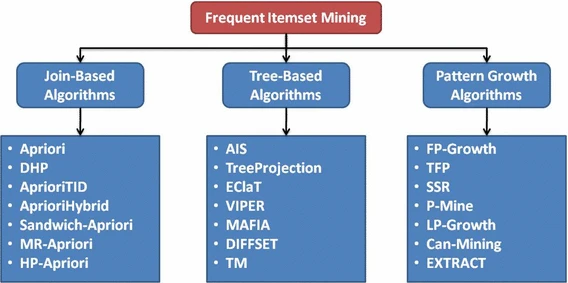

## Step 1. Import the necessary libraries
- `mlxtend`: Machine learning extensions. Machine learning에 사용하는 알고리즘들을 제공하는 파이썬 라이브러리로, 연관규칙 분석 시 사용하는 함수도 포함. 자세한 내용은 [다음](http://rasbt.github.io/mlxtend/)에서 확인 가능.

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

## Step 2. Import the dataset
- dataset: Chipotle.tsv from [Kaggle](https://www.kaggle.com/navneethc/chipotle)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/jej0312/DM_TA/main/data/movies.csv')

In [ ]:
df.head() # 각 rating의 내용 (title)에 대한 dataframe

userId         title  rating   timestamp
0       1  American Pie     4.0  1260759139
1       4  American Pie     4.0   949896114
2      15  American Pie     4.0  1052896867
3      30  American Pie     2.0   994439964
4      34  American Pie     4.0   973747765

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18571 entries, 0 to 18570
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     18571 non-null  int64  
 1   title      18571 non-null  object 
 2   rating     18571 non-null  float64
 3   timestamp  18571 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 580.5+ KB


## Step 3. Preprocess the dataset to appropriate form for association rule mining
- `mlxtend`에서 제공하는 [`TransactionEncoder`](http://rasbt.github.io/mlxtend/user_guide/preprocessing/TransactionEncoder/)을 사용하여 list 형식으로 구성된 거래 데이터를 2차원 numpy array로 변경  

In [ ]:
'''
1) userId로 이루어진 DataFrame을 nested list (유사 장바구니) 형태로 변경
   - userId가 동일한 title을 하나의 리스트로 묶음
   - 이 때, apriori 알고리즘의 정의에 의해, 중복된 연관 규칙은 제거할 필요가 있음
'''

df_tmp = df.groupby('userId')['title'].apply(set).apply(list).to_list()
print(df_tmp[:10])

[['Jay and Silent Bob Strike Back', 'American Pie'], ['A Nightmare on Elm Street', "Ocean's Eleven", 'My Own Private Idaho', 'Solaris', 'Lucky Number Slevin', 'Big Fish', 'Stand by Me', 'Reservoir Dogs', 'Cat on a Hot Tin Roof', 'Silent Hill', 'The Hours', 'Catwoman', 'The Devil Wears Prada', '2001: A Space Odyssey', 'Monsoon Wedding', 'Batman Begins', 'Fight Club', 'Lost in Translation', 'Terminator 3: Rise of the Machines', 'The Green Mile', 'Pocketful of Miracles', 'Monsters, Inc.', 'Wag the Dog', 'Psycho', 'Rebecca', 'True Romance', 'Live and Let Die', "Dave Chappelle's Block Party", 'Notting Hill', 'Love Actually', 'Romeo + Juliet', 'Batman Returns', 'Star Trek IV: The Voyage Home', 'The Conversation', 'Back to the Future Part II', 'The Last Samurai'], ['A Nightmare on Elm Street', 'Shortbus', 'Silent Hill', 'Finding Neverland', 'Solaris', 'License to Wed', 'The Conversation', 'To Kill a Mockingbird', 'A Very Long Engagement', 'Terminator 3: Rise of the Machines', '300'], ["Mr. Ho

In [ ]:
'''
2) nested list (유사 장바구니)를 association rule을 찾기 위한 dataframe의 형태로 변경
  - Via the fit method, the TransactionEncoder learns the unique labels in the dataset, and via the transform method, it transforms the input dataset (a Python list of lists) into a one-hot encoded NumPy boolean array
'''
te = TransactionEncoder()
te_ary = te.fit_transform(df_tmp) # df_tmp를 유사 장바구니 형태로 변경 (fit과 transform을 동시에 진행)
print(te_ary)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [ ]:
df = pd.DataFrame(te_ary, columns=te.columns_) # label 정보는 te.columns_에 저장되어 있으므로, 해당 값을 칼럼명으로 하는 데이터 프레임으로 변경.
df.head()

10 Things I Hate About You  12 Angry Men   1408  15 Minutes  16 Blocks  \
0                       False         False  False       False      False   
1                       False         False  False       False      False   
2                       False         False  False       False      False   
3                       False         False  False       False      False   
4                       False         False  False       False      False   

   20,000 Leagues Under the Sea  2001: A Space Odyssey   2046  21 Grams  \
0                         False                  False  False     False   
1                         False                   True  False     False   
2                         False                  False  False     False   
3                          True                  False  False     False   
4                         False                  False  False     False   

   25th Hour  ...  Willy Wonka & the Chocolate Factory  World Trade Center  \
0      False  ...                                False               False   
1      False  ...                                False               False   
2      False  ...                                False               False   
3      False  ...                                False               False   
4      False  ...                                False               False   

   X-Men Origins: Wolverine  Y Tu Mamá También  You Only Live Twice  \
0                     False              False                False   
1                     False              False                False   
2                     False              False                False   
3                      True              False                False   
4                     False              False                False   

   You, Me and Dupree  Young Frankenstein  Zodiac  eXistenZ    xXx  
0               False               False   False     False  False  
1               False               False   False     False  False  
2               False               False   False     False  False  
3               False                True   False     False  False  
4               False               False   False     False  False  

[5 rows x 856 columns]

## Step 4. Association rule mining
- 연관분석 함수(`apriori, association_rules`)를 사용하여 분석 진행  
  - 지지도(support): 범용성 0.1
    - rule의 조건이 일어날 확률
    - 전체 중에서 상품 A가 몇 번이나 판매되었는가  
  $s(X→Y)=P(X \cap Y)$  

  - 신뢰도(confidence) 0.7
    - rule의 조건이 일어났을 때, 결과가 발생할 확률
    - A를 구입한 주문 중 B도 동시에 구입한 주문 수  
  $c(X → Y)=\frac{P(X \cap Y)}{P(X)}=P(B|A)$  

  - 향상도(lift) 
    - 조건과 결과가 각각 독립적이라고 가정할 경우보다 얼마나 더 좋은지를 평가
    - 두 상품의 관계를 직접적으로 나타낸 것  
   $Lift(X, Y)=\frac{P(A \cap B)}{P(A) \times P(B)}=\frac{P(B|A)}{P(B)}$  
    - X가 기본 아이템일 경우 항상 confidence가 1이 나오는 경우 두 아이템 간 관계를 파악할 수 없으므로 향상도를 비교

- 일반적으로 association rule을 사용하여 분석할 때는 다음과 같은 과정을 거침  
    1) 특정 지지도 이상인 set을 찾음  
    2) 해당 set의 조합으로 만들 수 있는 rule 중 신뢰도 이하의 rule을 screening out   
    3) 향상도를 정렬하여 rule을 평가

- 해석 시 유의할 점
  - item의 선/후 혹은 인과 관계는 알 수 없음
  - item별 수량은 고려되지 않음

In [ ]:
''' Apriori Algorithm 활용
- 빈번하게 발생하는 아이템 셋에 대해서만 계산 (minimum support를 넘지 못하는 아이템을 포함하는 모든 아이템셋은 minimum support를 넘지 못함)
1. Support
- Minimum support를 지정하여, 등장 횟수가 일정 비율 이상의 아이템 set만 선정
  - 1) 각 item들에 대해 지지도를 계산 후 minimum 지지도가 넘는 items를 선정
  - 2) 1에서 구한 items들의 2개 조합으로 구성한 set을 생성 후 지지도 계산 (minimum 이상)
  - 3) 2에서 구한 set들의 조합으로, 3개의 item으로 구성된 항목에 대해 지지도 계산
  - 4) minimum 값을 넘는 조합이 없을 때까지 조합에 포함되는 item 개수를 늘려줌
'''
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True) # 여기서는 0.05를 기준으로 선정
frequent_itemsets.sort_values(by='support', ascending=False)

support                                           itemsets
123     0.483582               (Terminator 3: Rise of the Machines)
109     0.453731                                          (Solaris)
81      0.408955                                  (Monsoon Wedding)
1701    0.334328      (Solaris, Terminator 3: Rise of the Machines)
76      0.334328                                  (Men in Black II)
...          ...                                                ...
8462    0.050746  (The Conversation, 20,000 Leagues Under the Se...
8463    0.050746  (20,000 Leagues Under the Sea, Monsoon Wedding...
8465    0.050746  (20,000 Leagues Under the Sea, Monsoon Wedding...
72002   0.050746  (Solaris, The Conversation, To Kill a Mockingb...
102323  0.050746  (Rain Man, Silent Hill, Titanic, The Hours, Ba...

[102324 rows x 2 columns]

- Terminator 3: Rise of the Machines, Solaris을 본 경우가 많다. (support = 0.483582, 0.453731)
- Terminator 3: Rise of the Machines, Solaris를 같이 본 경우가 많다. (support = 0.334328)

In [ ]:
'''
2. Confidence
- 앞서 선정한 title (많이 관람한 영화)을 사용하여 함께 관람된 title를 확인
- antecedents (조건절), consequents (결과절): Antecedents를 관람했을 때 consequents를 구매
'''
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1).sort_values(by = ['confidence', 'lift', 'support'], ascending=False) # 최소 confidence를 0.1로 지정

antecedents  \
6014239  (To Kill a Mockingbird, Monsoon Wedding, Reser...   
6747121  (Titanic, To Kill a Mockingbird, Monsoon Weddi...   
3988153  (Batman Returns, Solaris, To Kill a Mockingbir...   
4544821  (To Kill a Mockingbird, Big Fish, Monsoon Wedd...   
5901407  (Batman Returns, Solaris, To Kill a Mockingbir...   
...                                                    ...   
256423                (Terminator 3: Rise of the Machines)   
144969                (Terminator 3: Rise of the Machines)   
3225                  (Terminator 3: Rise of the Machines)   
1756                  (Terminator 3: Rise of the Machines)   
3248                  (Terminator 3: Rise of the Machines)   

                                               consequents  \
6014239    (The Conversation, Silent Hill, Batman Returns)   
6747121    (The Conversation, Silent Hill, Batman Returns)   
3988153                             (Silent Hill, Titanic)   
4544821                             (Silent Hill, Titanic)   
5901407                             (Silent Hill, Titanic)   
...                                                    ...   
256423   (To Kill a Mockingbird, Silent Hill, The Termi...   
144969        (Reign Over Me, Silent Hill, Batman Returns)   
3225                                     (The Last Castle)   
1756                      (Jay and Silent Bob Strike Back)   
3248                                         (Whale Rider)   

         antecedent support  consequent support   support  confidence  \
6014239            0.052239            0.138806  0.052239    1.000000   
6747121            0.050746            0.138806  0.050746    1.000000   
3988153            0.053731            0.140299  0.053731    1.000000   
4544821            0.052239            0.140299  0.052239    1.000000   
5901407            0.052239            0.140299  0.052239    1.000000   
...                     ...                 ...       ...         ...   
256423             0.483582            0.074627  0.050746    0.104938   
144969             0.483582            0.076119  0.050746    0.104938   
3225               0.483582            0.077612  0.050746    0.104938   
1756               0.483582            0.079104  0.050746    0.104938   
3248               0.483582            0.079104  0.050746    0.104938   

             lift  leverage  conviction  
6014239  7.204301  0.044988         inf  
6747121  7.204301  0.043702         inf  
3988153  7.127660  0.046193         inf  
4544821  7.127660  0.044910         inf  
5901407  7.127660  0.044910         inf  
...           ...       ...         ...  
256423   1.406173  0.014658    1.033865  
144969   1.378601  0.013936    1.032198  
3225     1.352089  0.013215    1.030530  
1756     1.326578  0.012493    1.028863  
3248     1.326578  0.012493    1.028863  

[6882178 rows x 9 columns]

- (Monsoon Wedding, Dave Chappelle's Block Party)를 관람한 사람들 중 (Batman Returns, The Conversation, Silent Hill)을 같이 관람한 경우가 많았다 (Confidence = 1.000000)
- (Solaris, Batman Returns, Big Fish, To Kill a Mockingbird)를 관람한 사람들 중 (Titanic, Silent Hill)을 관람한 경우가 많았다 (confidence = 1.000000)

In [ ]:
'''
3. Lift
- 1보다 클 경우 A를 관람했을 때 B를 관람할 확률이 높아지는 것을 의미
- 1보다 작을 경우 A를 관람했을 때 B를 관람하지 않을 확률이 높은 것을 의미  
'''
association_rules(frequent_itemsets, metric="lift", min_threshold=1).sort_values(by = [ 'lift', 'confidence', 'support'], ascending=False)

(The Conversation, Silent Hill, Titanic, Jurassic Park)를 관람한 고객이 (Big Fish, To Kill a Mockingbird, Lost in Translation)을 관람할 확률에는 양의 상관관계가 있음 (lift = 12.943182)

- 지지도, 신뢰도 등의 minimum threshold를 결정할 때 주관성이 들어갈 수 있음
- 목적에 따라 중요하게 판단할 기준이 다를 수 있음
  - 신뢰도가 동일하다고 했을 때, 소비자노출이 중요하다면 지지도가 높은 Rule이, 노출 대비 소비자 반응률(구매여부)이 중요한 경우 향상도가 높은 Rule이 더 좋은 규칙

# Collaborative Filtering (협업 필터링)
- 추천 시스템: 고객의 선호, 관심, 구매경력과 같은 개인화 정보를 기초로 고객에게 가장 알맞은 구매정보 제공  
- 방식
  - Item-based collaborative filtering: item 간 similarity를 기반으로 추천
  - User-based collaborative filtering: user 간 similarity를 기반으로 추천
    - 성능이 다른 방식에 비해 떨어지는 것으로 알려져있음
  - Matrix factorization collaborative filtering: 잠재요인이 있다고 가정하여, 그 잠재요인을 행렬분해를 통해 찾아냄
    - 일반적으로 SVD(singular value decomposition)을 활용
    - [참고](https://greeksharifa.github.io/machine_learning/2019/12/17/Recommendation-System/#23-%EC%9E%A0%EC%9E%AC-%EC%9A%94%EC%9D%B8-%ED%98%91%EC%97%85-%ED%95%84%ED%84%B0%EB%A7%81)

- Input: user-item matrix (preference matrix)
  - 일반적으로 5점 척도로 구성된 rating + cosine similarity
  - binary인 경우 jaccard similarity 사용

- 한계
  - 단순 matrix를 사용하여 추천하기 때문에 context/content를 고려하지 않음
    - 최근에는 item의 text 정보, user의 context 정보들을 반영하여 딥러닝 기반의 추천 시스템 등장

https://eigentaste.berkeley.edu/dataset/ 

여기서 원본 데이터를 얻기는 했는데 분석이 불편한 것 같아서 제가 파일을 살짝 손봤어요. 제가 손 본 파일 쓰세용. 

해당 링크를 첨부한 건 보고서 쓰실 때 참고하셨으면 좋겠다고 생각해서 한 거에요!




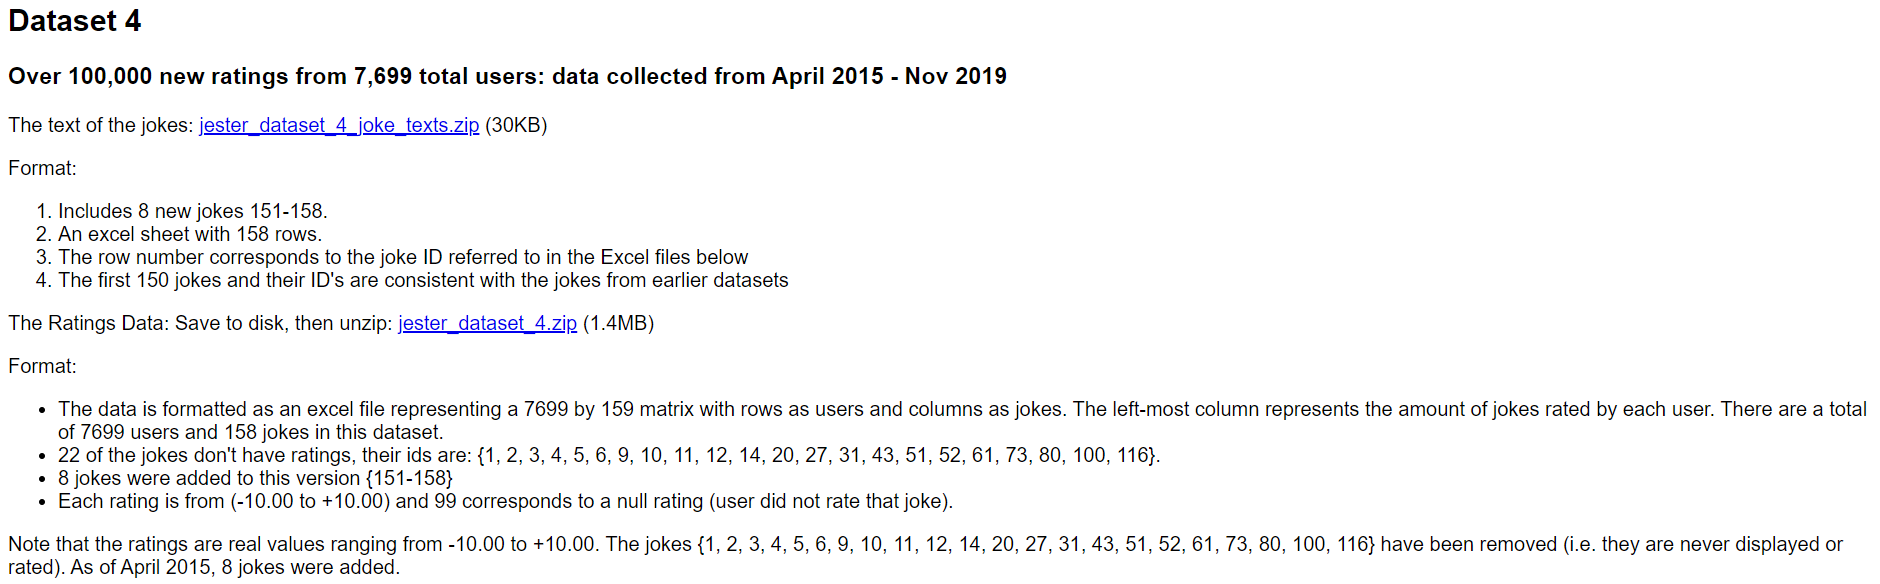

위 사이트의 사진 부분에 해당 데이터가 있습니다.

저 사진 속에 파란색이 두개죠? 

아래가 고객, 컨텐츠 2차원으로 된 행렬이고 위가 컨텐츠 이름 모아둔 파일이에요.

아래 파일에는 컨텐츠가 이름 없이 그냥 1,2,3,... 이런 식으로 네이밍 되어 있어서 그렇습니다.

In [ ]:
import pandas as pd
from google.colab import files

myfile = files.upload()
df = pd.read_csv('JokeRatings.csv')

Saving JokeRatings.csv to JokeRatings (1).csv


In [ ]:
df.head() # 다시 말씀드리지만 본 파일은 제가 살짝 수정한 거에요. 수정 전 파일이랑 수정 후 파일 비교해보시면 행하고 열만 추가한 걸 보실 수 있습니다.

user_id  number_of_ratings   1   2   3   4   5   6     7     8  ...   149  \
0        1                  1  99  99  99  99  99  99  99.0  99.0  ...  99.0   
1        2                  1  99  99  99  99  99  99  99.0  99.0  ...  99.0   
2        3                  4  99  99  99  99  99  99  99.0  99.0  ...  99.0   
3        4                 47  99  99  99  99  99  99  99.0  99.0  ...  99.0   
4        5                 13  99  99  99  99  99  99  99.0  99.0  ...  99.0   

    150    151    152   153   154   155   156    157    158  
0  99.0  99.00  99.00  99.0  99.0  99.0  99.0  99.00  99.00  
1  99.0  99.00  99.00  99.0  99.0  99.0  99.0  99.00  99.00  
2  99.0  99.00  99.00  99.0  99.0  99.0  99.0  99.00  99.00  
3  99.0   5.61  -4.51   0.0   0.0  99.0   0.0   5.93   4.19  
4  99.0  99.00  99.00  99.0   0.0  99.0  99.0  99.00   0.00  

[5 rows x 160 columns]

In [ ]:
df.shape

(7699, 160)

In [ ]:
# 근데 이 데이터에서는 고객들이 joke들에 -10~10점을 rating 하는 시스템인데, NaN을 99라는 숫자로 넣어버리면 cosine 닮음도 할 때 왜곡이 심할 것 같아서 그냥 중간 평점인 0을 넣었어요.
# 마치 조교님 실습 코드에서는 NaN을 3으로 채워넣는 거랑 같은 거죠.
wow = df
wow = wow.pivot_table(index = 'user_id') #일단 user_id로 기강을 잡습니다.
wow = df.replace(99,-10) # 99는 원래 NaN 자리를 99로 채워넣은 거라고 해요.
wow=wow.drop(['number_of_ratings'],axis=1) #이거는 해당 고객이 몇 개의 컨텐츠에 rating을 했냐는 건데, 그냥 빼버렸어요.
wow.head()

user_id   1   2   3   4   5   6     7     8   9  ...   149   150    151  \
0        1 -10 -10 -10 -10 -10 -10 -10.0 -10.0 -10  ... -10.0 -10.0 -10.00   
1        2 -10 -10 -10 -10 -10 -10 -10.0 -10.0 -10  ... -10.0 -10.0 -10.00   
2        3 -10 -10 -10 -10 -10 -10 -10.0 -10.0 -10  ... -10.0 -10.0 -10.00   
3        4 -10 -10 -10 -10 -10 -10 -10.0 -10.0 -10  ... -10.0 -10.0   5.61   
4        5 -10 -10 -10 -10 -10 -10 -10.0 -10.0 -10  ... -10.0 -10.0 -10.00   

     152   153   154   155   156    157    158  
0 -10.00 -10.0 -10.0 -10.0 -10.0 -10.00 -10.00  
1 -10.00 -10.0 -10.0 -10.0 -10.0 -10.00 -10.00  
2 -10.00 -10.0 -10.0 -10.0 -10.0 -10.00 -10.00  
3  -4.51   0.0   0.0 -10.0   0.0   5.93   4.19  
4 -10.00 -10.0   0.0 -10.0 -10.0 -10.00   0.00  

[5 rows x 159 columns]

- user들별로 평점을 주는 범위가 다르기 때문에 scaling하여 조정

In [ ]:
import numpy as np
wow_scaled = wow.apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)), axis=1)

## Item-based collaborative filtering
- Item*user으로 구성된 matrix를 사용하여 유사도 측정

In [ ]:
user_scaled = wow_scaled
wow_scaled = wow_scaled.transpose() # 저희는 joke 간의 연관성을 분석할 거라 joke들이 index에 오게 만들었습니다.
# 여기서 헷갈리시면 안되는게, user_id는 columns의 이름을 나타내는 것입니다. 1, 10, 100, 101, ... 이거는 joke의 id인데 이름을 붙이는 법을 모르겠습니다.
wow_scaled.head(5)

0         1         2         3         4         5         6     \
user_id  0.791581  0.648545  0.867619  0.667140  0.940583  0.671041  0.294622   
1       -0.011339 -0.010434 -0.020966 -0.211705 -0.059417 -0.142381 -0.181302   
2       -0.011339 -0.010434 -0.020966 -0.211705 -0.059417 -0.142381 -0.181302   
3       -0.011339 -0.010434 -0.020966 -0.211705 -0.059417 -0.142381 -0.181302   
4       -0.011339 -0.010434 -0.020966 -0.211705 -0.059417 -0.142381 -0.181302   

             7         8         9     ...      7689      7690      7691  \
user_id  0.742865  0.964376  0.957767  ...  0.993703  0.993447  0.993678   
1       -0.157135 -0.035624 -0.042233  ... -0.006297 -0.006553 -0.006322   
2       -0.157135 -0.035624 -0.042233  ... -0.006297 -0.006553 -0.006322   
3       -0.157135 -0.035624 -0.042233  ... -0.006297 -0.006553 -0.006322   
4       -0.157135 -0.035624 -0.042233  ... -0.006297 -0.006553 -0.006322   

             7692      7693      7694     7695     7696      7697      7698  
user_id  0.993705  0.993668  0.993483  0.99371  0.99346  0.993089  0.993687  
1       -0.006295 -0.006332 -0.006517 -0.00629 -0.00654 -0.006911 -0.006313  
2       -0.006295 -0.006332 -0.006517 -0.00629 -0.00654 -0.006911 -0.006313  
3       -0.006295 -0.006332 -0.006517 -0.00629 -0.00654 -0.006911 -0.006313  
4       -0.006295 -0.006332 -0.006517 -0.00629 -0.00654 -0.006911 -0.006313  

[5 rows x 7699 columns]

- user들 간 평점이 비슷한 정도를 기반으로 jokes의 유사도 평가

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
joke_sim = cosine_similarity(wow_scaled, wow_scaled)
user_sim = cosine_similarity(user_scaled, user_scaled)
print(joke_sim.shape)
print(user_sim.shape)

(159, 159)
(7699, 7699)


In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
joke_simu = euclidean_distances(wow_scaled, wow_scaled)
user_simu = euclidean_distances(user_scaled, user_scaled)
print(joke_simu.shape)
print(user_simu.shape)

(159, 159)
(7699, 7699)


In [ ]:
joke_sim = pd.DataFrame(joke_sim)#, index = wow_scaled.index, columns = wow_scaled.index)
joke_sim # joke들 간의 관계 분석이 끝났습니다.

0         1         2         3         4         5         6    \
0    1.000000 -0.806241 -0.806241 -0.806241 -0.806241 -0.806241 -0.806241   
1   -0.806241  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2   -0.806241  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
3   -0.806241  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
4   -0.806241  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
..        ...       ...       ...       ...       ...       ...       ...   
154 -0.405148  0.111813  0.111813  0.111813  0.111813  0.111813  0.111813   
155 -0.556817  0.429883  0.429883  0.429883  0.429883  0.429883  0.429883   
156 -0.481135  0.149723  0.149723  0.149723  0.149723  0.149723  0.149723   
157 -0.389233 -0.029593 -0.029593 -0.029593 -0.029593 -0.029593 -0.029593   
158 -0.291842 -0.122003 -0.122003 -0.122003 -0.122003 -0.122003 -0.122003   

          7         8         9    ...       149       150       151  \
0   -0.802746 -0.701446 -0.806241  ... -0.551343 -0.598697 -0.435047   
1    0.899938  0.690977  1.000000  ...  0.315260  0.434673  0.026274   
2    0.899938  0.690977  1.000000  ...  0.315260  0.434673  0.026274   
3    0.899938  0.690977  1.000000  ...  0.315260  0.434673  0.026274   
4    0.899938  0.690977  1.000000  ...  0.315260  0.434673  0.026274   
..        ...       ...       ...  ...       ...       ...       ...   
154  0.162376  0.264559  0.111813  ...  0.169277  0.105897  0.425150   
155  0.414869  0.392540  0.429883  ...  0.356221  0.523839  0.072307   
156  0.151472  0.108450  0.149723  ...  0.595305  0.020278  0.807653   
157 -0.036506 -0.039767 -0.029593  ...  0.376315  0.181919  0.798073   
158 -0.143398 -0.094508 -0.122003  ...  0.341795  0.135054  0.581410   

          152       153       154       155       156       157       158  
0   -0.463497 -0.358043 -0.405148 -0.556817 -0.481135 -0.389233 -0.291842  
1    0.060316 -0.097369  0.111813  0.429883  0.149723 -0.029593 -0.122003  
2    0.060316 -0.097369  0.111813  0.429883  0.149723 -0.029593 -0.122003  
3    0.060316 -0.097369  0.111813  0.429883  0.149723 -0.029593 -0.122003  
4    0.060316 -0.097369  0.111813  0.429883  0.149723 -0.029593 -0.122003  
..        ...       ...       ...       ...       ...       ...       ...  
154  0.179486  0.243794  1.000000  0.175034  0.260359  0.312687  0.523781  
155  0.337891  0.221906  0.175034  1.000000  0.238449  0.223187  0.242890  
156  0.689286  0.667796  0.260359  0.238449  1.000000  0.767188  0.616155  
157  0.761159  0.795404  0.312687  0.223187  0.767188  1.000000  0.734229  
158  0.624178  0.699988  0.523781  0.242890  0.616155  0.734229  1.000000  

[159 rows x 159 columns]

In [ ]:
joke_simu = pd.DataFrame(joke_simu)
joke_simu

0             1             2             3             4    \
0     0.000000  8.771747e+01  8.771747e+01  8.771747e+01  8.771747e+01   
1    87.717467  4.214685e-08  4.214685e-08  4.214685e-08  4.214685e-08   
2    87.717467  4.214685e-08  4.214685e-08  4.214685e-08  4.214685e-08   
3    87.717467  4.214685e-08  4.214685e-08  4.214685e-08  4.214685e-08   
4    87.717467  4.214685e-08  4.214685e-08  4.214685e-08  4.214685e-08   
..         ...           ...           ...           ...           ...   
154  87.593585  1.362216e+00  1.362216e+00  1.362216e+00  1.362216e+00   
155  87.607680  9.078016e-01  9.078016e-01  9.078016e-01  9.078016e-01   
156  87.608089  1.210304e+00  1.210304e+00  1.210304e+00  1.210304e+00   
157  87.594568  1.498905e+00  1.498905e+00  1.498905e+00  1.498905e+00   
158  87.572368  1.849351e+00  1.849351e+00  1.849351e+00  1.849351e+00   

              5             6          7          8             9    ...  \
0    8.771747e+01  8.771747e+01  87.694238  87.681982  8.771747e+01  ...   
1    4.214685e-08  4.214685e-08   0.339838   0.633219  4.214685e-08  ...   
2    4.214685e-08  4.214685e-08   0.339838   0.633219  4.214685e-08  ...   
3    4.214685e-08  4.214685e-08   0.339838   0.633219  4.214685e-08  ...   
4    4.214685e-08  4.214685e-08   0.339838   0.633219  4.214685e-08  ...   
..            ...           ...        ...        ...           ...  ...   
154  1.362216e+00  1.362216e+00   1.316258   1.277153  1.362216e+00  ...   
155  9.078016e-01  9.078016e-01   0.908825   0.965833  9.078016e-01  ...   
156  1.210304e+00  1.210304e+00   1.196451   1.272420  1.210304e+00  ...   
157  1.498905e+00  1.498905e+00   1.489687   1.540927  1.498905e+00  ...   
158  1.849351e+00  1.849351e+00   1.849925   1.863693  1.849351e+00  ...   

           149        150        151        152        153        154  \
0    87.642828  87.655956  87.601298  87.592788  87.593358  87.593585   
1     1.042696   0.914980   1.366729   1.274389   1.631860   1.362216   
2     1.042696   0.914980   1.366729   1.274389   1.631860   1.362216   
3     1.042696   0.914980   1.366729   1.274389   1.631860   1.362216   
4     1.042696   0.914980   1.366729   1.274389   1.631860   1.362216   
..         ...        ...        ...        ...        ...        ...   
154   1.427901   1.448898   1.267573   1.462100   1.590019   0.000000   
155   1.080062   0.900798   1.416094   1.144077   1.465174   1.385329   
156   0.920750   1.393739   0.689631   0.835077   1.026562   1.385331   
157   1.277007   1.426549   0.774136   0.825485   0.846335   1.452097   
158   1.558397   1.730675   1.312966   1.244140   1.163185   1.406686   

           155        156           157        158  
0    87.607680  87.608089  8.759457e+01  87.572368  
1     0.907802   1.210304  1.498905e+00   1.849351  
2     0.907802   1.210304  1.498905e+00   1.849351  
3     0.907802   1.210304  1.498905e+00   1.849351  
4     0.907802   1.210304  1.498905e+00   1.849351  
..         ...        ...           ...        ...  
154   1.385329   1.385331  1.452097e+00   1.406686  
155   0.000000   1.220965  1.384312e+00   1.630266  
156   1.220965   0.000000  8.148685e-01   1.254557  
157   1.384312   0.814869  1.281846e-07   1.083624  
158   1.630266   1.254557  1.083624e+00   0.000000  

[159 rows x 159 columns]

In [ ]:
joke_sim.sort_values(by=[149,149], ascending=False)[:10]

0         1         2         3         4         5         6    \
149 -0.551343  0.315260  0.315260  0.315260  0.315260  0.315260  0.315260   
78  -0.629500  0.457791  0.457791  0.457791  0.457791  0.457791  0.457791   
148 -0.635613  0.432226  0.432226  0.432226  0.432226  0.432226  0.432226   
48  -0.709791  0.600387  0.600387  0.600387  0.600387  0.600387  0.600387   
15  -0.707960  0.644213  0.644213  0.644213  0.644213  0.644213  0.644213   
83  -0.773743  0.704088  0.704088  0.704088  0.704088  0.704088  0.704088   
152 -0.463497  0.060316  0.060316  0.060316  0.060316  0.060316  0.060316   
156 -0.481135  0.149723  0.149723  0.149723  0.149723  0.149723  0.149723   
28  -0.641629  0.562626  0.562626  0.562626  0.562626  0.562626  0.562626   
87  -0.555901  0.233289  0.233289  0.233289  0.233289  0.233289  0.233289   

          7         8         9    ...       149       150       151  \
149  0.309730  0.413836  0.315260  ...  1.000000  0.246076  0.439881   
78   0.451267  0.540475  0.457791  ...  0.867014  0.344179  0.410723   
148  0.442914  0.400484  0.432226  ...  0.818158  0.373087  0.415544   
48   0.616921  0.562067  0.600387  ...  0.731213  0.484991  0.356290   
15   0.614554  0.477436  0.644213  ...  0.730340  0.257814  0.311713   
83   0.728919  0.598316  0.704088  ...  0.665046  0.355811  0.290278   
152  0.099337  0.179783  0.060316  ...  0.630626  0.380198  0.589536   
156  0.151472  0.108450  0.149723  ...  0.595305  0.020278  0.807653   
28   0.559662  0.538319  0.562626  ...  0.592892  0.408182  0.164344   
87   0.205227  0.177208  0.233289  ...  0.568564 -0.002573  0.751427   

          152       153       154       155       156       157       158  
149  0.630626  0.544648  0.169277  0.356221  0.595305  0.376315  0.341795  
78   0.595625  0.486764  0.181802  0.340342  0.545066  0.316137  0.276056  
148  0.571277  0.456508  0.118545  0.273853  0.581167  0.306973  0.259013  
48   0.483748  0.359087  0.113608  0.257806  0.497082  0.221597  0.176108  
15   0.497111  0.390013  0.059022  0.299842  0.572350  0.284536  0.220885  
83   0.482268  0.298694  0.116319  0.402345  0.491909  0.222952  0.121558  
152  1.000000  0.878844  0.179486  0.337891  0.689286  0.761159  0.624178  
156  0.689286  0.667796  0.260359  0.238449  1.000000  0.767188  0.616155  
28   0.249847  0.090784  0.293687  0.590159  0.212969  0.136048  0.038835  
87   0.629856  0.636773  0.290270  0.113117  0.799431  0.713659  0.502707  

[10 rows x 159 columns]

In [ ]:
joke_simu.sort_values(by=[149,149], ascending=False)[:10]

0          1          2          3          4          5    \
0     0.000000  87.717467  87.717467  87.717467  87.717467  87.717467   
72   87.041595   3.839526   3.839526   3.839526   3.839526   3.839526   
19   87.090504   3.034753   3.034753   3.034753   3.034753   3.034753   
105  87.249609   2.720824   2.720824   2.720824   2.720824   2.720824   
35   87.337093   2.380753   2.380753   2.380753   2.380753   2.380753   
53   87.492890   2.126316   2.126316   2.126316   2.126316   2.126316   
129  87.536785   2.023033   2.023033   2.023033   2.023033   2.023033   
89   87.514841   1.778496   1.778496   1.778496   1.778496   1.778496   
104  87.522713   2.109693   2.109693   2.109693   2.109693   2.109693   
68   87.544673   2.093672   2.093672   2.093672   2.093672   2.093672   

           6          7          8          9    ...        149        150  \
0    87.717467  87.694238  87.681982  87.717467  ...  87.642828  87.655956   
72    3.839526   3.825567   3.819180   3.839526  ...   3.699891   3.704518   
19    3.034753   3.021949   3.008954   3.034753  ...   2.816181   2.904453   
105   2.720824   2.706494   2.691389   2.720824  ...   2.495401   2.677405   
35    2.380753   2.361231   2.367890   2.380753  ...   2.146706   2.414838   
53    2.126316   2.113410   2.151560   2.126316  ...   2.011506   1.850783   
129   2.023033   2.012021   2.042217   2.023033  ...   1.962479   1.852437   
89    1.778496   1.782391   1.845308   1.778496  ...   1.915501   1.659007   
104   2.109693   2.065847   2.071525   2.109693  ...   1.897732   1.843887   
68    2.093672   2.077570   2.110803   2.093672  ...   1.884492   1.802958   

           151        152        153        154        155        156  \
0    87.601298  87.592788  87.593358  87.593585  87.607680  87.608089   
72    3.543843   3.536611   3.502662   3.480197   3.710116   3.587871   
19    2.884920   2.713328   2.737372   3.006031   2.823649   2.805855   
105   2.547297   2.448565   2.493209   2.475032   2.565020   2.473406   
35    2.061851   2.116556   2.178802   2.104840   2.315601   2.021497   
53    1.772698   1.675169   1.630531   1.853893   1.970193   1.817831   
129   2.161929   1.881869   1.995944   2.072279   1.969406   2.069221   
89    1.947169   1.789590   1.979489   2.007746   1.676617   1.900085   
104   1.598562   1.567889   1.485302   1.716267   1.988204   1.683080   
68    1.605584   1.504060   1.412694   2.047353   1.951514   1.652813   

           157        158  
0    87.594568  87.572368  
72    3.487522   3.271653  
19    2.823426   2.773010  
105   2.554951   2.262512  
35    2.149538   1.933585  
53    1.568307   1.456495  
129   2.094925   2.072692  
89    1.853412   2.123496  
104   1.464436   1.363033  
68    1.394315   1.627559  

[10 rows x 159 columns]

In [ ]:
joke_sim.sort_values(by=[149,149], ascending=False)[149][:10] # 제일 비슷한 거 10개를 추리면 다음과 같습니다.


149    1.000000
78     0.867014
148    0.818158
48     0.731213
15     0.730340
83     0.665046
152    0.630626
156    0.595305
28     0.592892
87     0.568564
Name: 149, dtype: float64

In [ ]:
joke_sim.sort_values(by=[78,78], ascending=False)[78][:10]

78     1.000000
149    0.867014
48     0.816399
148    0.786714
15     0.733800
83     0.718301
28     0.633566
99     0.597538
152    0.595625
47     0.591461
Name: 78, dtype: float64

In [ ]:
joke_simu.sort_values(by=[149,149], ascending=True)[149][:10] # 제일 비슷한 거 10개를 추리면 다음과 같습니다.


149    0.000000
78     0.492939
148    0.572861
48     0.680059
15     0.684796
83     0.741397
28     0.843133
99     0.881071
152    0.883267
109    0.904185
Name: 149, dtype: float64

In [ ]:
joke_simu.sort_values(by=[78,78], ascending=True)[78][:10]

78     3.650024e-08
149    4.929389e-01
48     5.237972e-01
148    5.816549e-01
83     6.292463e-01
15     6.351348e-01
28     7.540904e-01
47     7.593762e-01
99     7.615415e-01
115    7.761632e-01
Name: 78, dtype: float64



---



---



In [ ]:
user_sim = pd.DataFrame(user_sim)#, index = wow_scaled.index, columns = wow_scaled.index)
user_sim # joke들 간의 관계 분석이 끝났습니다.

0         1         2         3         4         5         6     \
0     1.000000  0.995545  0.719057  0.236689  0.519232  0.267175  0.117997   
1     0.995545  1.000000  0.704360  0.234926  0.510516  0.263572  0.110351   
2     0.719057  0.704360  1.000000  0.210892  0.601340  0.249105  0.130529   
3     0.236689  0.234926  0.210892  1.000000  0.363987  0.490190  0.066361   
4     0.519232  0.510516  0.601340  0.363987  1.000000  0.454716  0.111519   
...        ...       ...       ...       ...       ...       ...       ...   
7694  0.623903  0.547444  0.545290  0.155788  0.378491  0.188871  0.132797   
7695  0.623075  0.546554  0.543385  0.153355  0.376639  0.186491  0.132594   
7696  0.623505  0.547019  0.544311  0.156165  0.379417  0.189870  0.133943   
7697  0.623914  0.547459  0.544597  0.158379  0.379764  0.189895  0.134836   
7698  0.624470  0.548048  0.544555  0.153713  0.377364  0.187139  0.132757   

          7         8         9     ...      7689      7690      7691  \
0     0.229871  0.567340  0.531744  ...  0.623068  0.623878  0.623893   
1     0.222580  0.556052  0.511593  ...  0.546547  0.547417  0.547430   
2     0.359341  0.828900  0.754940  ...  0.543585  0.544595  0.545343   
3     0.587342  0.173937  0.314876  ...  0.153377  0.155692  0.153707   
4     0.369479  0.626110  0.568588  ...  0.376687  0.379288  0.377726   
...        ...       ...       ...  ...       ...       ...       ...   
7694  0.198916  0.428353  0.481027  ...  0.999979  0.999979  0.999982   
7695  0.195230  0.426203  0.478850  ...  0.999999  0.999983  0.999997   
7696  0.198119  0.426960  0.480965  ...  0.999964  0.999964  0.999964   
7697  0.199844  0.427791  0.481419  ...  0.999952  0.999958  0.999952   
7698  0.195804  0.427623  0.479683  ...  0.999998  0.999983  0.999998   

          7692      7693      7694      7695      7696      7697      7698  
0     0.623071  0.624189  0.623903  0.623075  0.623505  0.623914  0.624470  
1     0.546550  0.547748  0.547444  0.546554  0.547019  0.547459  0.548048  
2     0.543517  0.544773  0.545290  0.543385  0.544311  0.544597  0.544555  
3     0.153370  0.154223  0.155788  0.153355  0.156165  0.158379  0.153713  
4     0.376671  0.377354  0.378491  0.376639  0.379417  0.379764  0.377364  
...        ...       ...       ...       ...       ...       ...       ...  
7694  0.999979  0.999982  1.000000  0.999979  0.999957  0.999957  0.999980  
7695  1.000000  0.999995  0.999979  1.000000  0.999965  0.999952  0.999997  
7696  0.999965  0.999961  0.999957  0.999965  1.000000  0.999944  0.999963  
7697  0.999952  0.999954  0.999957  0.999952  0.999944  1.000000  0.999952  
7698  0.999998  0.999997  0.999980  0.999997  0.999963  0.999952  1.000000  

[7699 rows x 7699 columns]

In [ ]:
user_simu = pd.DataFrame(user_simu)
user_simu

0         1         2         3         4         5         6     \
0     0.000000  0.143488  1.119893  4.246958  2.141203  3.492381  2.433625   
1     0.143488  0.000000  1.138701  4.245164  2.155976  3.490360  2.408330   
2     1.119893  1.138701  0.000000  4.320017  2.003916  3.565915  2.569491   
3     4.246958  4.245164  4.320017  0.000000  4.166826  4.078184  4.766852   
4     2.141203  2.155976  2.003916  4.166826  0.000000  3.329047  3.162169   
...        ...       ...       ...       ...       ...       ...       ...   
7694  1.016169  1.054188  1.348321  4.322428  2.319345  3.558804  2.317752   
7695  1.017245  1.055256  1.350594  4.324891  2.321343  3.561228  2.318010   
7696  1.016665  1.054663  1.349479  4.322047  2.318349  3.557792  2.316651   
7697  1.016082  1.054050  1.349107  4.319793  2.317968  3.557736  2.315686   
7698  1.015497  1.053568  1.349209  4.324530  2.320563  3.560571  2.317847   

          7         8         9     ...      7689      7690      7691  \
0     3.736253  1.869357  1.711941  ...  1.017252  1.016192  1.016217   
1     3.737131  1.888076  1.731812  ...  1.055262  1.054205  1.054261   
2     3.569775  1.300300  1.318724  ...  1.350357  1.349140  1.348275   
3     3.748067  4.555431  4.190091  ...  4.324868  4.322521  4.324535   
4     3.712315  2.075532  2.141470  ...  2.321291  2.318486  2.320173   
...        ...       ...       ...  ...       ...       ...       ...   
7694  3.748565  2.051343  1.759396  ...  0.006388  0.006419  0.005919   
7695  3.752318  2.053717  1.761873  ...  0.001231  0.005751  0.002563   
7696  3.749373  2.052880  1.759466  ...  0.008424  0.008495  0.008449   
7697  3.747600  2.051958  1.758943  ...  0.009785  0.009139  0.009746   
7698  3.751734  2.052151  1.760926  ...  0.001884  0.005882  0.002057   

          7692      7693      7694      7695      7696      7697      7698  
0     1.017249  1.015845  1.016169  1.017245  1.016665  1.016082  1.015497  
1     1.055259  1.053901  1.054188  1.055256  1.054663  1.054050  1.053568  
2     1.350437  1.348948  1.348321  1.350594  1.349479  1.349107  1.349209  
3     4.324876  4.324015  4.322428  4.324891  4.322047  4.319793  4.324530  
4     2.321309  2.320573  2.319345  2.321343  2.318349  2.317968  2.320563  
...        ...       ...       ...       ...       ...       ...       ...  
7694  0.006387  0.006064  0.000000  0.006463  0.009245  0.009207  0.006383  
7695  0.000815  0.003040  0.006463  0.000000  0.008327  0.009826  0.002549  
7696  0.008371  0.008765  0.009245  0.008327  0.000000  0.010573  0.008598  
7697  0.009782  0.009583  0.009207  0.009826  0.010573  0.000000  0.009779  
7698  0.002051  0.002617  0.006383  0.002549  0.008598  0.009779  0.000000  

[7699 rows x 7699 columns]

In [ ]:
user_sim.sort_values(by=[7690,7690], ascending=False)[:10]

0         1         2         3         4         5         6     \
7690  0.623878  0.547417  0.544595  0.155692  0.379288  0.189463  0.133120   
7321  0.624128  0.547684  0.544807  0.155280  0.378440  0.189075  0.132786   
6664  0.624433  0.548010  0.544417  0.154988  0.378692  0.188437  0.132994   
7151  0.624192  0.547752  0.545138  0.154869  0.378649  0.189080  0.132824   
7524  0.624020  0.547568  0.545114  0.155425  0.378084  0.188202  0.132742   
6893  0.624153  0.547709  0.544045  0.154608  0.379081  0.188413  0.132806   
7584  0.624047  0.547596  0.544971  0.154539  0.378390  0.188067  0.132532   
6925  0.624329  0.547898  0.544905  0.154958  0.378413  0.188447  0.132648   
6715  0.623723  0.547249  0.544784  0.153960  0.378308  0.187361  0.132656   
7076  0.623922  0.547462  0.544892  0.154612  0.377980  0.187728  0.132627   

          7         8         9     ...      7689      7690      7691  \
7690  0.197724  0.427793  0.480614  ...  0.999983  1.000000  0.999984   
7321  0.197487  0.427600  0.480530  ...  0.999989  0.999988  0.999990   
6664  0.197143  0.427379  0.480529  ...  0.999991  0.999988  0.999991   
7151  0.197200  0.427925  0.480627  ...  0.999989  0.999988  0.999991   
7524  0.196597  0.427882  0.480687  ...  0.999991  0.999987  0.999993   
6893  0.196233  0.427276  0.479941  ...  0.999992  0.999987  0.999991   
7584  0.196237  0.427845  0.480735  ...  0.999992  0.999987  0.999994   
6925  0.196745  0.427982  0.480681  ...  0.999991  0.999986  0.999993   
6715  0.195877  0.427573  0.480257  ...  0.999996  0.999986  0.999998   
7076  0.196705  0.427523  0.480724  ...  0.999992  0.999986  0.999993   

          7692      7693      7694      7695      7696      7697      7698  
7690  0.999983  0.999984  0.999979  0.999983  0.999964  0.999958  0.999983  
7321  0.999989  0.999991  0.999981  0.999989  0.999966  0.999953  0.999989  
6664  0.999991  0.999994  0.999979  0.999992  0.999967  0.999956  0.999992  
7151  0.999990  0.999992  0.999983  0.999989  0.999965  0.999952  0.999990  
7524  0.999991  0.999993  0.999982  0.999991  0.999959  0.999960  0.999991  
6893  0.999992  0.999993  0.999978  0.999993  0.999964  0.999957  0.999992  
7584  0.999992  0.999996  0.999984  0.999992  0.999958  0.999954  0.999992  
6925  0.999991  0.999992  0.999980  0.999991  0.999965  0.999952  0.999992  
6715  0.999997  0.999994  0.999983  0.999997  0.999965  0.999954  0.999996  
7076  0.999992  0.999995  0.999980  0.999993  0.999964  0.999955  0.999991  

[10 rows x 7699 columns]

In [ ]:
user_simu.sort_values(by=[7690,7690], ascending=False)[:10]

0         1         2         3         4             5     \
3   4.246958  4.245164  4.320017  0.000000  4.166826  4.078184e+00   
7   3.736253  3.737131  3.569775  3.748067  3.712315  3.423312e+00   
5   3.492381  3.490360  3.565915  4.078184  3.329047  5.960464e-08   
4   2.141203  2.155976  2.003916  4.166826  0.000000  3.329047e+00   
6   2.433625  2.408330  2.569491  4.766852  3.162169  3.905616e+00   
8   1.869357  1.888076  1.300300  4.555431  2.075532  3.654234e+00   
10  1.927475  1.944877  1.938970  4.097444  2.461473  3.843926e+00   
9   1.711941  1.731812  1.318724  4.190091  2.141470  3.519284e+00   
15  1.718551  1.738583  1.728797  3.990735  2.175851  2.910127e+00   
46  1.806295  1.816596  1.865482  4.114313  2.531617  3.491385e+00   

            6             7         8         9     ...      7689      7690  \
3   4.766852e+00  3.748067e+00  4.555431  4.190091  ...  4.324868  4.322521   
7   3.956990e+00  5.960464e-08  3.588633  3.515185  ...  3.752095  3.749772   
5   3.905616e+00  3.423312e+00  3.654234  3.519284  ...  3.561021  3.558202   
4   3.162169e+00  3.712315e+00  2.075532  2.141470  ...  2.321291  2.318486   
6   4.214685e-08  3.956990e+00  2.946015  2.813610  ...  2.317954  2.317430   
8   2.946015e+00  3.588633e+00  0.000000  1.719070  ...  2.053175  2.051960   
10  2.779696e+00  3.642570e+00  2.423711  2.136795  ...  1.901749  1.900570   
9   2.813610e+00  3.515185e+00  1.719070  0.000000  ...  1.761644  1.759864   
15  2.810622e+00  3.388361e+00  2.173189  2.046743  ...  1.728564  1.727270   
46  2.598898e+00  3.481732e+00  2.242485  2.079408  ...  1.567961  1.566832   

        7691      7692      7693      7694      7695      7696      7697  \
3   4.324535  4.324876  4.324015  4.322428  4.324891  4.322047  4.319793   
7   3.751436  3.752170  3.751253  3.748565  3.752318  3.749373  3.747600   
5   3.560734  3.561091  3.560122  3.558804  3.561228  3.557792  3.557736   
4   2.320173  2.321309  2.320573  2.319345  2.321343  2.318349  2.317968   
6   2.317805  2.317973  2.317908  2.317752  2.318010  2.316651  2.315686   
8   2.051488  2.053358  2.052301  2.051343  2.053717  2.052880  2.051958   
10  1.901061  1.901764  1.901300  1.900308  1.901793  1.901017  1.898656   
9   1.760151  1.761721  1.760203  1.759396  1.761873  1.759466  1.758943   
15  1.727877  1.728696  1.728056  1.728121  1.728955  1.725571  1.726429   
46  1.567600  1.568060  1.567597  1.565922  1.568255  1.567274  1.564083   

        7698  
3   4.324530  
7   3.751734  
5   3.560571  
4   2.320563  
6   2.317847  
8   2.052151  
10  1.901294  
9   1.760926  
15  1.727827  
46  1.567721  

[10 rows x 7699 columns]

In [ ]:
user_sim.sort_values(by=[7690,7690], ascending=False)[7690][:10] # 제일 비슷한 거 10개를 추리면 다음과 같습니다.
# 149 입력하면 이름까지 바로 나오게 할 수 있으면 좋긴 한데, 이거는 시간 남으면 'JokeTexts' 파일 연동해서 추가 구현해볼게용.

7690    1.000000
7321    0.999988
6664    0.999988
7151    0.999988
7524    0.999987
6893    0.999987
7584    0.999987
6925    0.999986
6715    0.999986
7076    0.999986
Name: 7690, dtype: float64

In [ ]:
user_sim.sort_values(by=[7321,7321], ascending=False)[7321][:10]

7321    1.000000
7151    0.999997
6164    0.999996
6925    0.999996
7161    0.999995
6529    0.999995
7287    0.999995
6106    0.999994
5483    0.999994
6603    0.999993
Name: 7321, dtype: float64

In [ ]:
user_simu.sort_values(by=[7690,7690], ascending=True)[7690][:10] # 제일 비슷한 거 10개를 추리면 다음과 같습니다.

7690    0.000000
7321    0.004875
6664    0.004877
7151    0.004884
7524    0.005156
6893    0.005170
7584    0.005171
6925    0.005196
6715    0.005281
7076    0.005322
Name: 7690, dtype: float64

In [ ]:
user_simu.sort_values(by=[7321,7321], ascending=True)[7321][:10]

7321    0.000000
7151    0.002511
6164    0.002872
6925    0.002910
7161    0.003113
6529    0.003292
7287    0.003299
6106    0.003545
5483    0.003570
6603    0.003595
Name: 7321, dtype: float64

In [ ]:
'''
@ References

https://bkshin.tistory.com/entry/NLP-8-%EB%AC%B8%EC%84%9C-%EC%9C%A0%EC%82%AC%EB%8F%84-%EC%B8%A1%EC%A0%95-%EC%BD%94%EC%82%AC%EC%9D%B8-%EC%9C%A0%EC%82%AC%EB%8F%84

https://blog.naver.com/ytlee64/222350463365

https://analyticsindiamag.com/apriori-vs-fp-growth-in-market-basket-analysis-a-comparative-guide/

https://process-mining.tistory.com/92

'''

# 아래 appendice는 무시하죠 저희~~



---



---



---



---



---



# Appendices

## Appendix 1. Multilevel Association Rule  
  - Association rules created from mining information at <u>different degrees of reflection</u> are called various level or staggered association rules.
  - Multilevel association rules can be mined effectively utilizing idea progressions under a help certainty system. Rules at a high idea level may add to good judgment while rules at a low idea level may not be valuable consistently.
  - Items often form hierarchy  
  - Items of the lower level are expected to have lower support.  
  - [Example](https://link.springer.com/chapter/10.1007/978-3-662-47895-0_11)  
  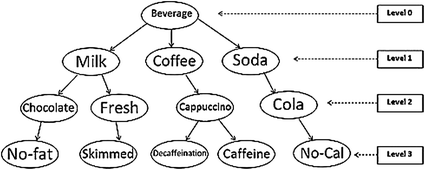!
  - Support  
    1) Uniform Support(Using uniform minimum support for all level)  
    2) Reduced Support (Using reduced minimum support at lower levels)  
    3) Group-based Support(Using item or group based support)  

- 참고
  - https://www.geeksforgeeks.org/multilevel-association-rule-in-data-mining/
  - https://www.ques10.com/p/9335/multilevel-and-multidimensional-association-rules/


## Appendix 2. Multidimensional Association Rule
1) Single – dimension rules: It contains the single distinct predicate i.e. buys Buys(X, “milk”) = buys (X,”bread”)  
2) Multi-dimensional rule: It contains more than one predicate  
3) Inter-dimension association rule: It has no repeated predicate  
Age (X,”19-25”) ^ occupation (X, “student”) = buys (X, “coke”).  
4) Hybrid dimension association rules: It contains multiple occurrence of the same predicate i.e. buys Age(X, “19-25”) ^ buys (X, “popcorn”) = buys (X, “coke”)  

- 참고
  - https://www.ques10.com/p/9335/multilevel-and-multidimensional-association-rules/
  - https://www.geeksforgeeks.org/data-mining-multidimensional-association-rule/?ref=lbp

## Appendix 3. [Computing frequent itemsets with duplicate items in transactions](https://stackoverflow.com/questions/21032817/computing-frequent-itemsets-with-duplicate-items-in-transactions)  
   - apriori 알고리즘에서 중복된 연관 규칙을 제거해야 한다고 하였는데(=몇 번 구매했는지가 반영되지 않음), 중복을 반영하고자 하면 어떻게 해결할 수 있는가?  
   - 1) 데이터셋을 변경
     - (기존) Chicken Bowl을 두 번 구매했을 경우 {Chicken Bowl, Chicken Bowl}이 {Chicken Bowl}로 중복제거 됨
     - (변경 후) {Chicken Bowl, Chicken Bowl 2}의 형식으로, 이름을 바꾸어준 후 association rule mining. 이 경우 '두 번째 Chicken Bowl을 구매한 사람은 첫 번째 Chicken Bowl도 구매함'의 형식으로 rule이 생성될 것.  
   - 2) High utility itemset mining
   - 3) weighted itemset mining

### Appendix 4. Recommender system Overview
- 전반적인 진행 과정 및 evaluation metrics에 관한 [Medium 글](https://drive.google.com/file/d/1c5fd4ii89PgTmU-Gmzok3PKiqJZGZiw5/view?usp=sharing)
  - 연세대학교 계정으로 확인